**INTRODUCTION**

In today's highly competitive telecommunications industry, customer churn poses a significant challenge for companies striving to maintain market share and profitability. SyriaTel, a leading telecommunications provider in Syria, is no exception. With increasing competition and evolving customer expectations, understanding the factors influencing churn and implementing effective retention strategies are paramount to sustaining business success. This project aims to analyze SyriaTel's customer data, identify key drivers of churn, and develop actionable insights to reduce churn rates and enhance customer retention

**OBJECTIVES**
1. Data Exploration and Preprocessing: Explore and preprocess SyriaTel's customer data to ensure data quality and suitability for analysis.
2. Feature Selection and Engineering: Identify relevant features and engineer new features that may contribute to predicting customer churn.
3. Model Development and Evaluation: Develop predictive models using machine learning algorithms to accurately predict customer churn. Evaluate model performance using appropriate metrics.
4. Insights Generation: Interpret model results to identify key drivers of churn and gain actionable insights into customer behavior and preferences.
5. Recommendation Formulation: Formulate actionable recommendations based on insights generated to mitigate churn and improve customer retention.

**BUSINESS UNDERSTANDING**

**Stakeholder and Business Problem**

SyriaTel is facing a growing challenge of customer churn, which not only impacts its revenue and profitability but also undermines its market competitiveness and brand reputation. The company aims to understand the underlying reasons driving churn among its subscriber base and implement effective strategies to mitigate churn rates. By leveraging advanced analytics and predictive modeling techniques, SyriaTel seeks to proactively address customer churn and foster long-term relationships with its subscribers. The audience of this project findings would be the telecommunication company, Syriatel. The findings and recommendations will help reduce the amount of customer churn, thus reducing the amount of losses incurred as a result. 

In this project, we will follow a systematic approach to develop predictive models for churn prediction using machine learning techniques. These steps include:

1. Data Collection and Understanding: We'll start by loading and exploring the Syriatel dataset to understand its structure, features, and distribution.
2. Data Preparation: These processes includes; handling missing values and encoding categorical variables.
3. Modeling: We'll experiment with various classification algorithms, including logistic regression, XGBoosting, Adaboositng, random forests, and gradient boosting, to build predictive models for churn prediction.
4. Model Evaluation: The performance of each model will be evaluated using appropriate evaluation metrics, and the best-performing model will be selected as our final model.
5. Recommendations: Based on the insights gained from the analysis, we'll provide recommendations to Syriatel on potential strategies to mitigate churn and retain customers effectively.

By using analytics and machine learning, we aim to help Syriatel gain actionable insights into customer behavior and improve their retention efforts, ultimately driving business growth and profitability.

**Description of the data**

This data was extracted from kaggle with the following description of the features.

1. State: The state in which the customer resides.
2. Account Length: The number of days the customer has been with the company.
3. Area Code: The area code associated with the customer's phone number.
4. Phone Number: The customer's phone number, which serves as a unique identifier.
5. International Plan: Whether the customer has an international calling plan (Yes/No).
6. Voice Mail Plan: Whether the customer has a voicemail plan (Yes/No).
7. Number Vmail Messages: The number of voicemail messages the customer has.
8. Total Day Minutes: The total number of minutes the customer used during the daytime.
9. Total Day Calls: The total number of calls the customer made during the daytime.
10. Total Day Charge: The total charge for daytime usage.
11. Total Eve Minutes: The total number of minutes the customer used during the evening.
12. Total Eve Calls: The total number of calls the customer made during the evening.
13. Total Eve Charge: The total charge for evening usage.
14. Total Night Minutes: The total number of minutes the customer used during the night.
15. Total Night Calls: The total number of calls the customer made during the night.
16. Total Night Charge: The total charge for nighttime usage.
17. Total Intl Minutes: The total number of international minutes used by the customer.
18. Total Intl Calls: The total number of international calls made by the customer.
19. Total Intl Charge: The total charge for international calls.
20. Customer Service Calls: The number of customer service calls made by the customer.
21. Churn: The target variable indicating whether the customer churned (i.e., stopped doing business with the company).

**DATA UNDERSTANDING AND CLEANING**

In [1]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

In [2]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\Hp\Downloads\archive (7)\bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Checking for missing values
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [4]:
#Checking overview of data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Converting churn column to binary (0 or 1)
df['churn'] = df['churn'].replace({False: 0, True: 1})
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
# Converting nternational Plan and Voice Mail Plan columns to binary (1 or 0)
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
#Displaying statistics summary of the features
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [8]:
#Dropping irrelevant columns for the study
df.drop(columns=['phone number', 'area code', 'state'], inplace=True)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

**DATA EXPLORATION AND VISUALIZATION**

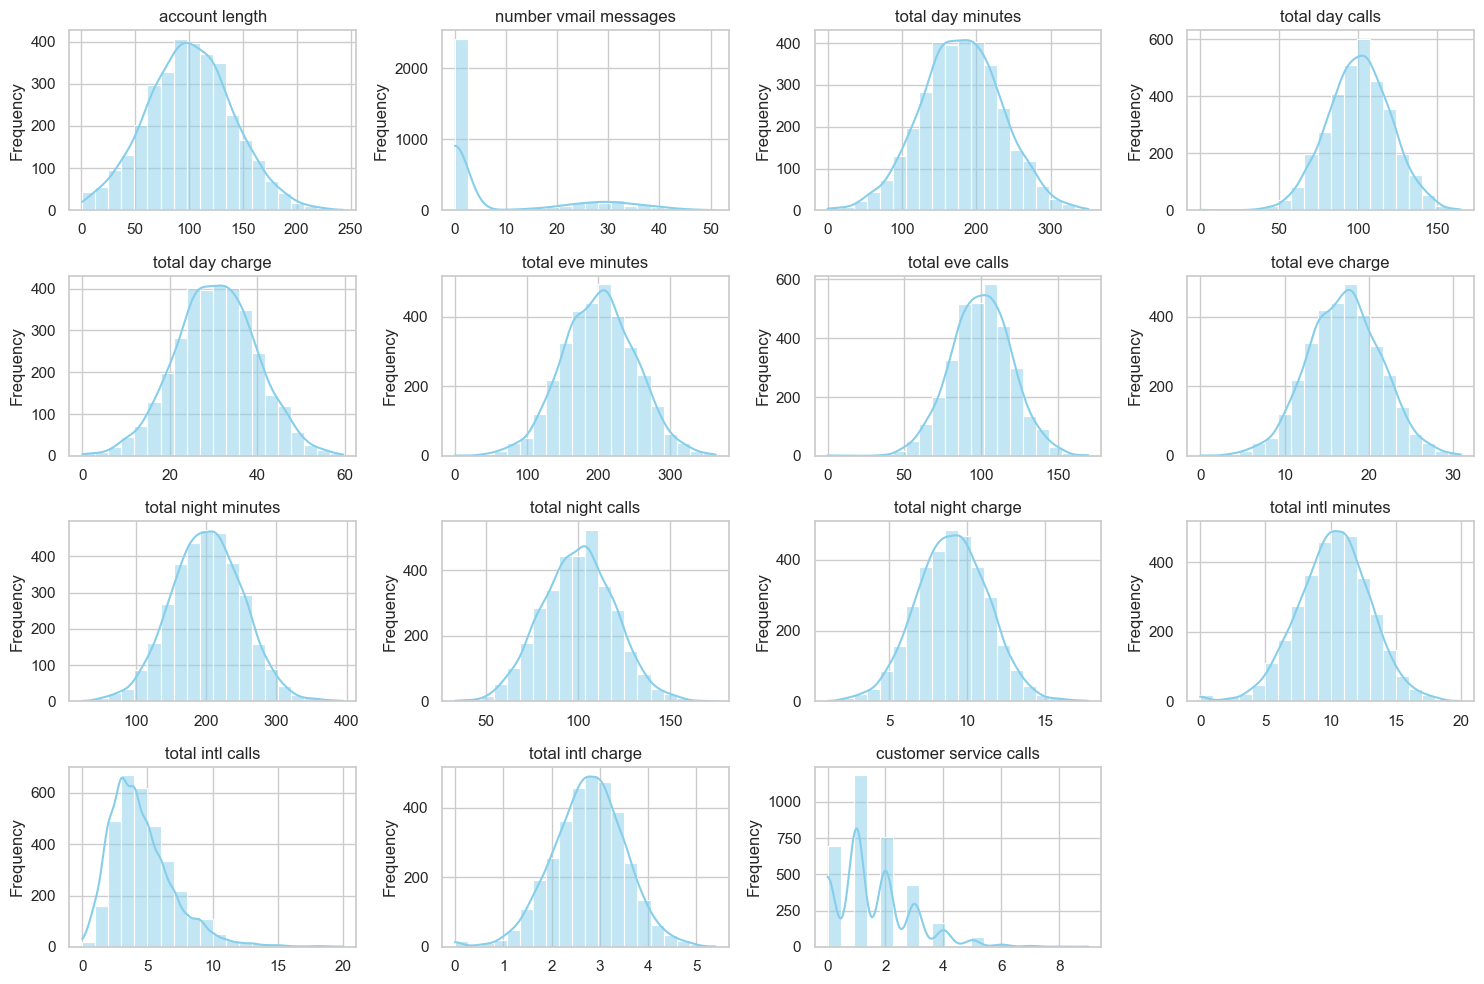

In [10]:
import warnings
# Ignoring future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Setting the style for the plots
sns.set(style="whitegrid")

# Defining the numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 
                      'total day calls', 'total day charge', 'total eve minutes', 
                      'total eve calls', 'total eve charge', 'total night minutes', 
                      'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']

# Converting numerical features to float if necessary
for feature in numerical_features:
    df[feature] = df[feature].astype(float)

# Visualizing the distribution of numerical features using histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Most of the features have a bell curve, indicating that there is a normal distribution,that is the values are evenly distributed on both sides of the mean.

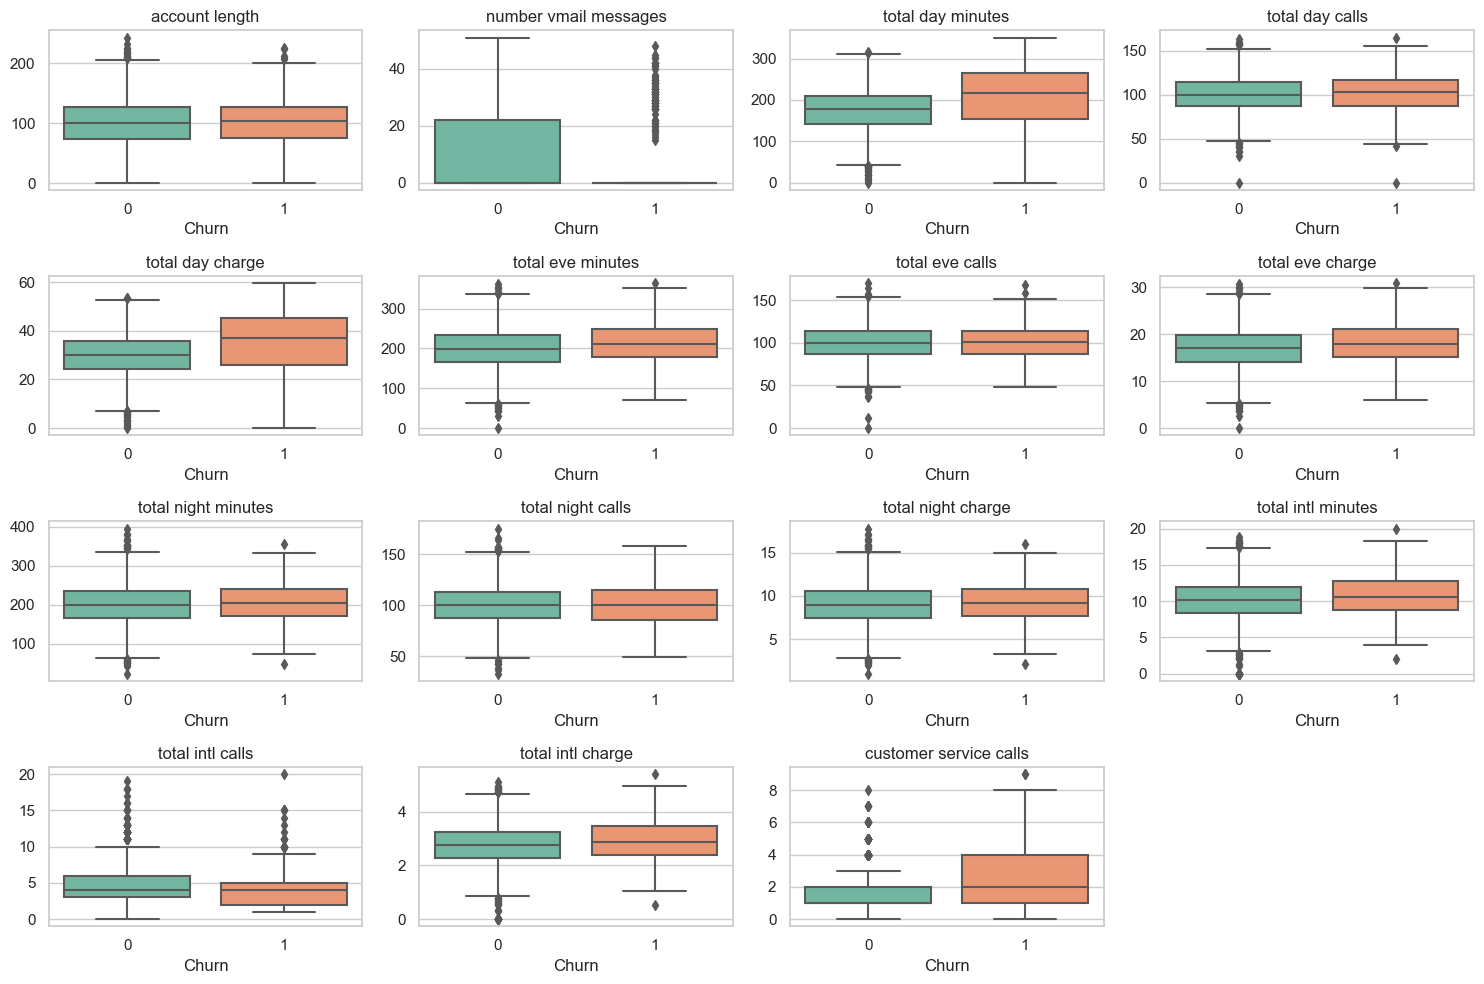

In [11]:
# Examining the relationship between numerical features and the target variable (churn) using box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='churn', y=feature, data=df, palette='Set2')
    plt.title(feature)
    plt.xlabel('Churn')
    plt.ylabel('')
plt.tight_layout()
plt.show()

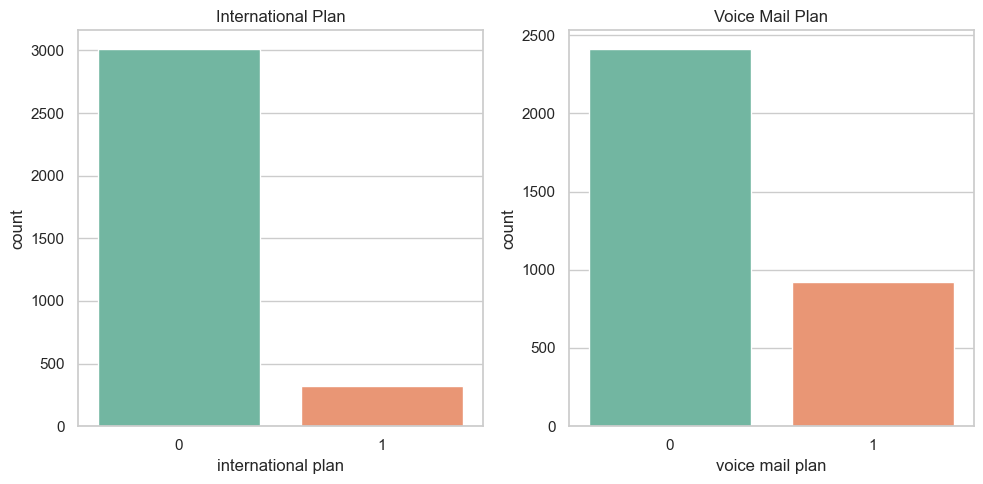

In [12]:
# Visualizing the distribution of categorical features using bar plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='international plan', data=df, palette='Set2')
plt.title('International Plan')

plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', data=df, palette='Set2')
plt.title('Voice Mail Plan')

plt.tight_layout()
plt.show()

This shows that most customers do not have internation plan and voice mail plan. 

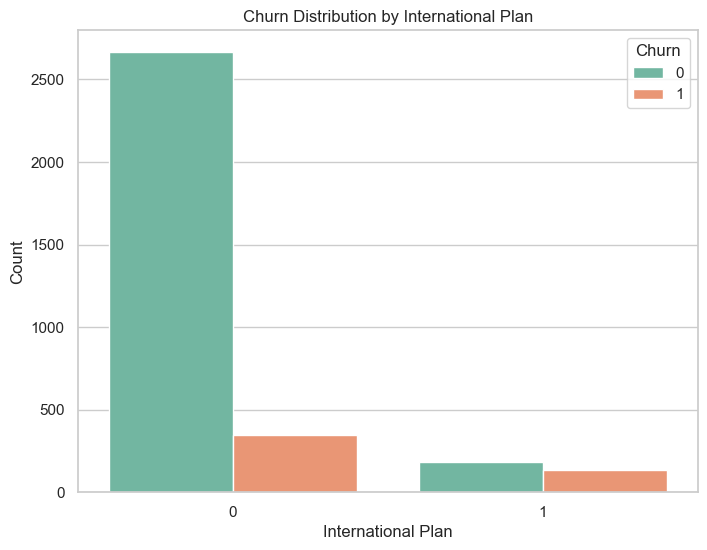

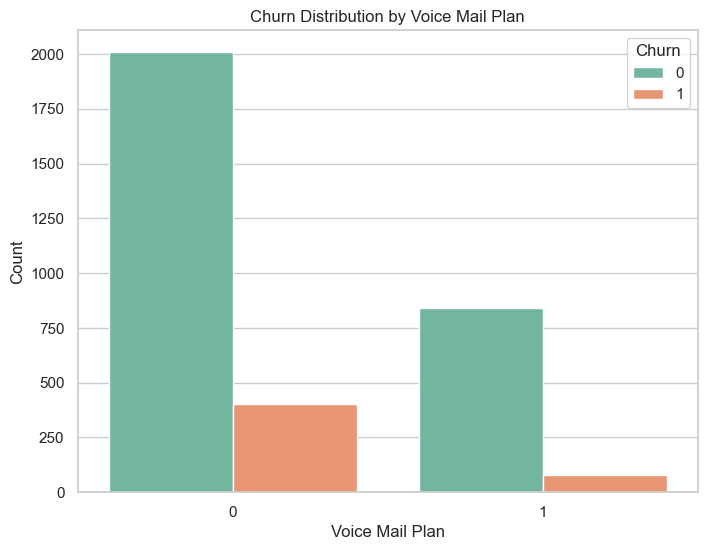

In [13]:
#Examining the rlship between categorical variables and target variable
# Converting churn column to string type
df['churn'] = df['churn'].astype(str)

# Creating a bar plot for international plan vs. churn
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df, palette='Set2')
plt.title('Churn Distribution by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Creating a bar plot for voice mail plan vs churn
plt.figure(figsize=(8, 6))
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='Set2')
plt.title('Churn Distribution by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

The plots shows that customers without international are less likely to churn and also customers wothout voice mail plan are less likely to churn.

In [14]:
# Calculating correlation coefficients with target variable
correlation = df.corr()['churn'].sort_values(ascending=False)

# Displaying correlation coefficients
print(correlation)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


**Feature Engineering**

In [15]:
# Creating interaction features
df['avg_day_call_duration'] = df['total day minutes'] / df['total day calls']
df['avg_eve_call_duration'] = df['total eve minutes'] / df['total eve calls']
df['avg_night_call_duration'] = df['total night minutes'] / df['total night calls']
df['avg_intl_call_duration'] = df['total intl minutes'] / df['total intl calls']
df['avg_day_charge_per_minute'] = df['total day charge'] / df['total day minutes']
df['avg_eve_charge_per_minute'] = df['total eve charge'] / df['total eve minutes']
df['avg_night_charge_per_minute'] = df['total night charge'] / df['total night minutes']
df['avg_intl_charge_per_minute'] = df['total intl charge'] / df['total intl minutes']

# Checking the updated dataset
df.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,customer service calls,churn,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,avg_day_charge_per_minute,avg_eve_charge_per_minute,avg_night_charge_per_minute,avg_intl_charge_per_minute
0,128.0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,...,1.0,0,2.410000,1.993939,2.689011,3.333333,0.170011,0.085005,0.044994,0.270000
1,107.0,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,...,1.0,0,1.313821,1.898058,2.469903,4.566667,0.169988,0.085013,0.045008,0.270073
2,137.0,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,...,0.0,0,2.135088,1.101818,1.563462,2.440000,0.170008,0.084983,0.045018,0.269672
3,84.0,1,0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,...,2.0,0,4.216901,0.703409,2.212360,0.942857,0.170007,0.084976,0.044997,0.269697
4,75.0,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,...,3.0,0,1.475221,1.215574,1.544628,3.366667,0.170006,0.085030,0.044997,0.270297


In [16]:
# Calculating correlation matrix
correlation_matrix = df.corr()

# Displaying correlation values with churn
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
print(churn_correlation)


churn                          1.000000
international plan             0.259852
customer service calls         0.208750
total day minutes              0.205151
total day charge               0.205151
avg_day_call_duration          0.154030
total eve minutes              0.092796
total eve charge               0.092786
avg_intl_call_duration         0.082878
total intl charge              0.068259
total intl minutes             0.068239
avg_eve_call_duration          0.050024
total night charge             0.035496
total night minutes            0.035493
avg_night_call_duration        0.023433
total day calls                0.018459
account length                 0.016541
total eve calls                0.009233
total night calls              0.006141
avg_intl_charge_per_minute    -0.001715
avg_night_charge_per_minute   -0.003009
avg_day_charge_per_minute     -0.007103
avg_eve_charge_per_minute     -0.008959
total intl calls              -0.052844
number vmail messages         -0.089728


In [17]:
# Identifying missing values after feature engineering
missing_values = df.isnull().sum()
print(missing_values)


account length                  0
international plan              0
voice mail plan                 0
number vmail messages           0
total day minutes               0
total day calls                 0
total day charge                0
total eve minutes               0
total eve calls                 0
total eve charge                0
total night minutes             0
total night calls               0
total night charge              0
total intl minutes              0
total intl calls                0
total intl charge               0
customer service calls          0
churn                           0
avg_day_call_duration           2
avg_eve_call_duration           1
avg_night_call_duration         0
avg_intl_call_duration         18
avg_day_charge_per_minute       2
avg_eve_charge_per_minute       1
avg_night_charge_per_minute     0
avg_intl_charge_per_minute     18
dtype: int64


In [18]:
#dropping the missing values
df.dropna(inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

account length                 0
international plan             0
voice mail plan                0
number vmail messages          0
total day minutes              0
total day calls                0
total day charge               0
total eve minutes              0
total eve calls                0
total eve charge               0
total night minutes            0
total night calls              0
total night charge             0
total intl minutes             0
total intl calls               0
total intl charge              0
customer service calls         0
churn                          0
avg_day_call_duration          0
avg_eve_call_duration          0
avg_night_call_duration        0
avg_intl_call_duration         0
avg_day_charge_per_minute      0
avg_eve_charge_per_minute      0
avg_night_charge_per_minute    0
avg_intl_charge_per_minute     0
dtype: int64


**Model Training**

In [19]:

# Defining features and target variable
X = df.drop('churn', axis=1)
y = df['churn']

# Spliting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2649, 25) (2649,)
Testing set shape: (663, 25) (663,)


In [20]:
#Scaling the data

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


In [21]:
# Initializing logistic regression model with adjusted parameters
log_reg = LogisticRegression(max_iter=1000)

# Training the model
log_reg.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = log_reg.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generating confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8702865761689291

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       574
           1       0.55      0.19      0.28        89

    accuracy                           0.87       663
   macro avg       0.72      0.58      0.61       663
weighted avg       0.84      0.87      0.84       663


Confusion Matrix:
[[560  14]
 [ 72  17]]


The logistic regression model, achieves an accuracy of approximately 87.03% on the dataset. The model demonstrates high precision and recall for the majority class (no churn), indicating its proficiency in identifying instances with no churn. However, its performance on the minority class (churn) is notably lower. The model struggles to correctly predict churn instances, as evidenced by its low recall and precision scores for the churn class. This suggests a potential issue with class imbalance or the complexity of the churn prediction task. Lets conduct feature selection to try improve the model. 

**Feature selection** 

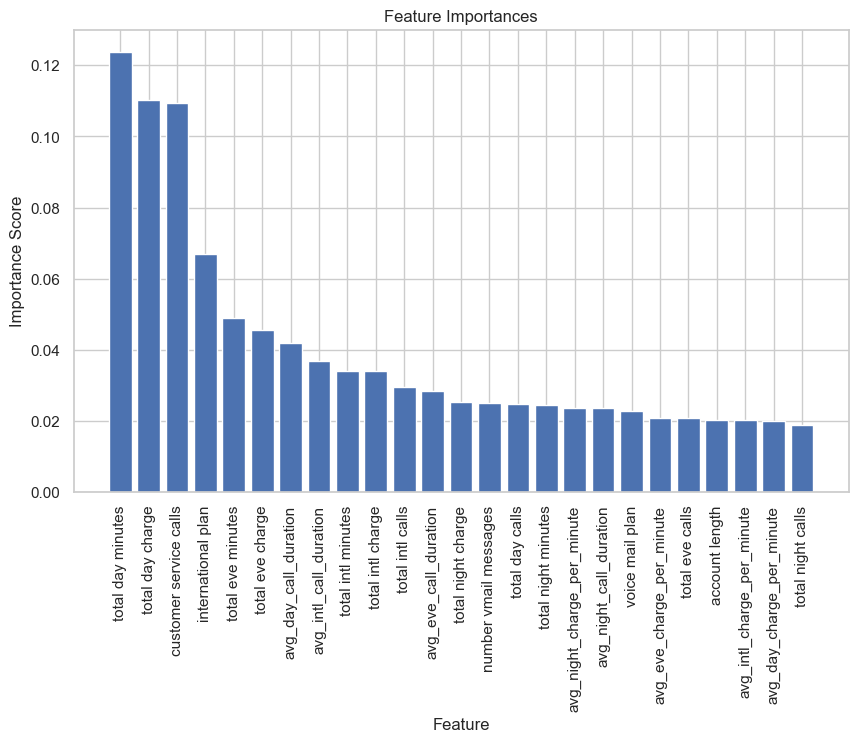

In [22]:
# Initializing random forest classifier
rf = RandomForestClassifier()

# Training the model
rf.fit(X_train, y_train)

# Getting feature importances
importances = rf.feature_importances_

# Sorting feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


In [23]:
#Selecting the features with high importance
# Specifying the features to keep
features_to_keep = ['churn', 'total day charge', 'customer service calls', 'total day minutes', 
                    'avg_day_call_duration', 'avg_eve_call_duration', 'avg_night_call_duration', 
                    'avg_intl_call_duration', 'international plan', 'total eve minutes', 
                    'total eve charge', 'total intl charge']

# Selecting the specified features from the DataFrame
df = df[features_to_keep]


In [24]:
df.head()

,churn,total day charge,customer service calls,total day minutes,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,international plan,total eve minutes,total eve charge,total intl charge
0,0,45.07,1.0,265.1,2.410000,1.993939,2.689011,3.333333,0,197.4,16.78,2.70
1,0,27.47,1.0,161.6,1.313821,1.898058,2.469903,4.566667,0,195.5,16.62,3.70
2,0,41.38,0.0,243.4,2.135088,1.101818,1.563462,2.440000,0,121.2,10.30,3.29
3,0,50.90,2.0,299.4,4.216901,0.703409,2.212360,0.942857,1,61.9,5.26,1.78
4,0,28.34,3.0,166.7,1.475221,1.215574,1.544628,3.366667,1,148.3,12.61,2.73


In [25]:
# Defining features and target variable
X = df.drop('churn', axis=1)
y = df['churn']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2649, 11) (2649,)
Testing set shape: (663, 11) (663,)


In [26]:
# Initializing StandardScaler
scaler = StandardScaler()

# Fitting and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the testing data
X_test_scaled = scaler.transform(X_test)


In [27]:
# Initializing logistic regression model with adjusted parameters
log_reg = LogisticRegression(max_iter=1000)

# Trainning the model
log_reg.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = log_reg.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Generating classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generating confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8748114630467572

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       574
           1       0.62      0.18      0.28        89

    accuracy                           0.87       663
   macro avg       0.75      0.58      0.60       663
weighted avg       0.85      0.87      0.84       663


Confusion Matrix:
[[564  10]
 [ 73  16]]


The model's performance has slightly improved after dropping less important features. The accuracy increased to 87.48%, indicating that the model correctly predicts churn/non-churn cases for about 87.48% of the instances in the test set. However, the precision, recall, and F1-score for the positive class (churn) are still relatively low, indicating that the model struggles to correctly classify churn cases. Hyperparameter tuning needs to be done to get the best model.

**Hyperperameter tuning**

In [28]:
# Defining models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()

# Defining parameter grids
param_grid_logreg = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2']
}

param_grid_rf = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__min_samples_split': [2, 5, 10]
}

# Defining pipelines with scaling
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', logistic_regression)
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', random_forest)
])

# Performing grid search
grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy')

# Fitting grid search models
grid_search_logreg.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Getting best parameters
best_params_logreg = grid_search_logreg.best_params_
best_params_rf = grid_search_rf.best_params_

# Getting best estimators
best_estimator_logreg = grid_search_logreg.best_estimator_
best_estimator_rf = grid_search_rf.best_estimator_

# Printing best parameters
print("Best Parameters - Logistic Regression:", best_params_logreg)
print("Best Parameters - Random Forest:", best_params_rf)


Best Parameters - Logistic Regression: {'clf__C': 0.01, 'clf__penalty': 'l2'}
Best Parameters - Random Forest: {'clf__max_depth': 20, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


In [31]:
# Instantiating models with best parameters
best_logreg = LogisticRegression(C=0.01, penalty='l2', max_iter=1000)
best_rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=2)

# Training models
best_logreg.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Predictions
logreg_pred = best_logreg.predict(X_test)
rf_pred = best_rf.predict(X_test)

# Evaluating performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("Classification Report:")
print(classification_report(y_test, logreg_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_pred))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


Logistic Regression:
Accuracy: 0.8672699849170438
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       574
           1       0.60      0.03      0.06        89

    accuracy                           0.87       663
   macro avg       0.73      0.52      0.50       663
weighted avg       0.83      0.87      0.81       663

Confusion Matrix:
[[572   2]
 [ 86   3]]

Random Forest:
Accuracy: 0.9245852187028658
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       574
           1       0.78      0.61      0.68        89

    accuracy                           0.92       663
   macro avg       0.86      0.79      0.82       663
weighted avg       0.92      0.92      0.92       663

Confusion Matrix:
[[559  15]
 [ 35  54]]


After conducting hyperparameter tuning, it is clear that the Random Forest model outperforms the Logistic Regression model in terms of accuracy and F1-score. The Random Forest model achieved an accuracy of 92.61%, with a precision of 78% for predicting churn. In contrast, the Logistic Regression model yielded an accuracy of 86.7%, with a precision of only 60%. Lets use further esemble methods to check the best fit model. 

In [38]:
# Using XGBoost, gradient boost and adaboost

# Converting target variable to integer type
y_train = y_train.astype(int)

# Fiting the XGBoost model
xgb_pipeline.fit(X_train, y_train)

# Defining Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()

# Defining AdaBoost Classifier
adaboost_model = AdaBoostClassifier()

# Defining XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Defining pipelines
gbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', gbm_model)
])

adaboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', adaboost_model)
])

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', xgb_model)
])

# Fiting the models
gbm_pipeline.fit(X_train, y_train)
adaboost_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)


# Converting true labels to integers
y_true_int = y_test.astype(int)

# Evaluating the XGBoost model on the test set
print("XGBoost Classifier - Test Performance:")
y_pred_xgb = xgb_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_true_int, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_true_int, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_true_int, y_pred_xgb))



XGBoost Classifier - Test Performance:
Accuracy: 0.9200603318250377
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       574
           1       0.78      0.56      0.65        89

    accuracy                           0.92       663
   macro avg       0.86      0.77      0.80       663
weighted avg       0.91      0.92      0.91       663

Confusion Matrix:
[[560  14]
 [ 39  50]]


The XGBoost model shows an accuracy of approximately 92%, with a precision of 93% for class 0  and 78% for class 1. Recall is higher for class 0 at 98%, while for class 1 is 56. This  indicates that the model is better at identifying non-churn instances. The F1-score, which considers both precision and recall, is 95% for class 0 and 65% for class 1.

The confusion matrix shows that out of 574 instances of class 0, the model correctly predicts 560 instances, while for class 1, out of 89 instances, the model correctly predicts 50 instances.

In [39]:
# Evaluating the AdaBoost model on the test set
print("AdaBoost Classifier - Test Performance:")
y_pred_adaboost = adaboost_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_true_int, y_pred_adaboost))
print("Classification Report:")
print(classification_report(y_true_int, y_pred_adaboost))
print("Confusion Matrix:")
print(confusion_matrix(y_true_int, y_pred_adaboost))

AdaBoost Classifier - Test Performance:
Accuracy: 0.8838612368024132
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       574
           1       0.64      0.31      0.42        89

    accuracy                           0.88       663
   macro avg       0.77      0.64      0.68       663
weighted avg       0.87      0.88      0.87       663

Confusion Matrix:
[[558  16]
 [ 61  28]]


The AdaBoost model has an accuracy of approximately 88.39%. It has a precision of (90%) in correctly identifying non-churn instances and achieves a high recall (97%) for the same class, indicating its ability to effectively capture true non-churn cases. However, its performance is less satisfactory for churn instances, with a lower precision (64%) and recall (31%). This suggests that the model excels in accurately predicting non-churn instances. The confusion matrix shows the classifier's proficiency in classifying non-churn instances but showing a higher rate of misclassifications for churn instances. 

In [41]:
# Evaluating the Gradient Boosting model on the test set
print("Gradient Boosting Classifier - Test Performance:")
y_pred_gbm = gbm_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_true_int, y_pred_gbm))
print("Classification Report:")
print(classification_report(y_true_int, y_pred_gbm))
print("Confusion Matrix:")
print(confusion_matrix(y_true_int, y_pred_gbm))

Gradient Boosting Classifier - Test Performance:
Accuracy: 0.9170437405731523
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       574
           1       0.76      0.56      0.65        89

    accuracy                           0.92       663
   macro avg       0.85      0.77      0.80       663
weighted avg       0.91      0.92      0.91       663

Confusion Matrix:
[[558  16]
 [ 39  50]]


The Gradient Boosting model accuracy is 91.70%. It demonstrates high precision (93%) and recall (97%) for non-churn instances, indicating its effectiveness in accurately identifying customers who are likely to stay . However, its performance is relatively weaker for churn instances, with lower precision (76%) and recall (56%). This suggests that while the model performs well in predicting non-churn cases, there is room for improvement in its ability to detect churn cases. The confusion matrix shows the classifier's proficiency in classifying non-churn instances but showing a higher rate of misclassifications for churn instances. 

Based on the evaluation metrics, the Random Forest model demonstrates strong overall performance in predicting customer churn. With an accuracy of 92.46%, the model is able to correctly classify the majority of instances. The precision for predicting non-churners (class 0) is high at 94%, indicating a low false positive rate, while the precision for predicting churners (class 1) is 78%, suggesting a moderate false positive rate. The recall, or true positive rate, is 61% for class 1, indicating that the model captures a significant portion of the actual churn cases. The F1-score, is 68% for class 1, reflecting a reasonable trade-off between precision and recall. The confusion matrix shows that the model correctly identifies 559 non-churners and 54 churners, while misclassifying 15 non-churners as churners and 35 churners as non-churners. Overall, considering the high accuracy and reasonable precision and recall values, the Random Forest model appears to be a suitable choice for predicting customer churn in this scenario. However, further analysis such as error analysis could provide additional insights and potential avenues for improvement


**Anaylzing features importances on the selected random forest model**

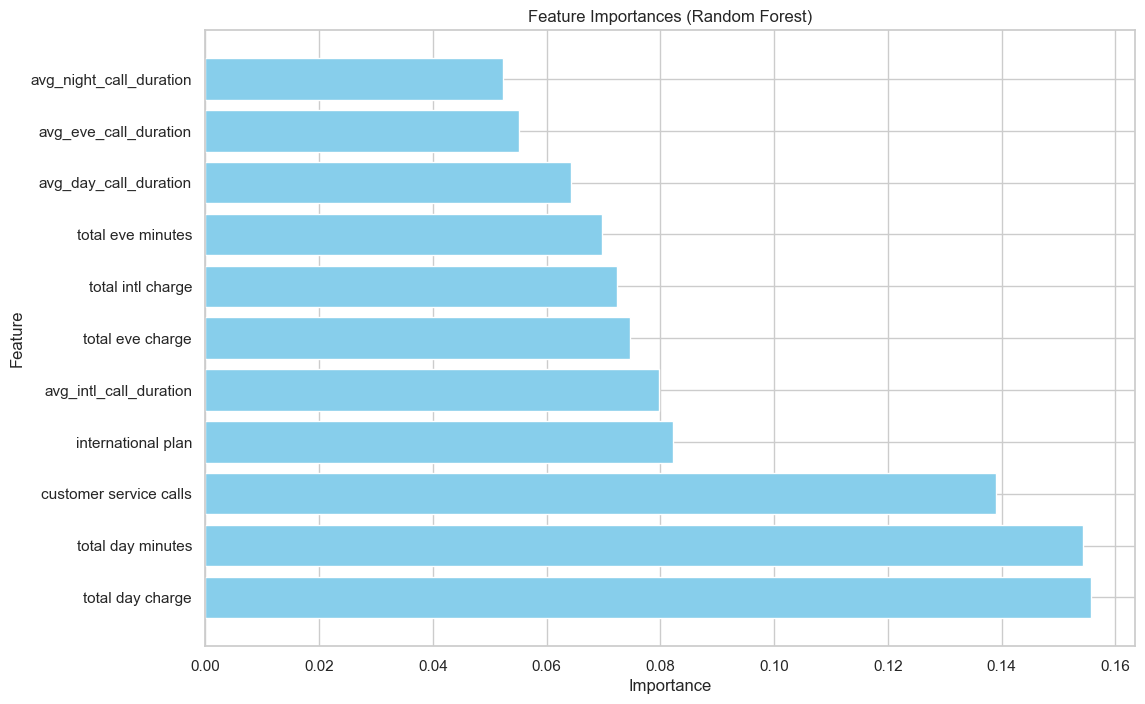

In [43]:
# Training the Random Forest model
best_rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=2)
best_rf.fit(X_train, y_train)

# Extracting feature importances
feature_importances = best_rf.feature_importances_

# Creating a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()


Higher total day charges and longer day call durations suggest dissatisfaction with daytime calling plans or high costs, potentially driving customers to switch providers. An increased number of customer service calls indicates unresolved issues or dissatisfaction, highlighting the importance of prompt and effective problem resolution to enhance customer satisfaction. Customers with international plans and longer international call durations are more likely to churn, indicating dissatisfaction with international calling services or costs. Additionally, high evening and night call charges may signal dissatisfaction with service quality, prompting telecom companies to reassess their evening calling packages. 

**CONCLUSION**

In conclusion, this project aimed to analyze customer churn in the telecommunication industry and identify key factors influencing churn behavior. Through the exploration of various machine learning models that is; logistic regression, random forest, AdaBoost, and gradient boosting, we discovered that factors such as total day charges, total day minutes, customer service calls, international plan usage, and average international call duration significantly impact churn rates. Leveraging these insights, SyriaTel can implement targeted strategies to improve customer retention, such as enhancing customer service responsiveness, optimizing calling plans, and tailoring promotions based on usage patterns. By prioritizing customer satisfaction and addressing underlying reasons for churn, syriaTel can foster stronger customer relationships and sustain business growth. Additionally, ongoing analysis and adaptation of strategies based on evolving customer preferences are crucial for maintaining competitiveness in the dynamic telecommunications market. 

**RECOMMENDATIONS**

1. Enhancing Customer Support: Given the observed impact of customer service calls on churn rates, SyriaTel should prioritize enhancing the quality and responsiveness of its customer support services. This could involve investing in comprehensive training programs for customer service representatives, implementing efficient call handling processes, and promptly addressing customer queries and concerns.

2. Revising Calling Plans: SyriaTel should review its calling plans, particularly focusing on factors like total day charges, total day minutes, and international plan usage, to ensure they align with customer expectations and market competitiveness. Offering flexible and value-driven calling plans that cater to diverse customer needs can help retain existing subscribers and attract new ones.

3. Personalizing Offers and Promotions: Utilizing customer data analytics, SyriaTel can develop personalized offers and promotions tailored to individual preferences and usage patterns. By understanding customer behavior, such as average international call duration and evening call usage, the company can offer targeted incentives to encourage loyalty and increase customer satisfaction.

3. Proactive Monitoring and Analysis: Implementing robust data monitoring and analysis practices will enable SyriaTel to detect early signs of customer churn and take proactive measures to mitigate it. Leveraging advanced analytics tools and machine learning algorithms can provide deeper insights into customer behavior, allowing for timely intervention and targeted retention strategies.

4. Improved Communication Channels: SyriaTel should establish effective communication channels to keep customers informed about relevant offers, updates, and service improvements. Leveraging multiple channels such as SMS notifications, email campaigns, and personalized messages will enhance customer engagement and satisfaction.

6. Focus on Customer Experience: Enhancing the overall customer experience should be a priority for SyriaTel. This involves investing in user-friendly interfaces, self-service options, and seamless customer journeys across all touchpoints. By prioritizing customer-centricity, SyriaTel can foster stronger relationships with its subscribers and foster long-term loyalty.

Implementing these recommendations will enable SyriaTel to effectively reduce churn rates, improve customer retention, and position itself as a leading telecommunications provider in the Syrian market